In [453]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500) 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(matplotlib.backends.backend)

import plotly
import plotly.plotly as py
import plotly.figure_factory as ff

import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='ashu.ingenuity@gmail.com', api_key='yvO5VATu1byoKNShHVN0')

module://ipykernel.pylab.backend_inline


# Reading master data frame

In [454]:
master = pd.read_csv('./master.csv')

In [455]:
master = master.drop(['level_0'], axis=1)
master = master.drop (['Presence_of_violation'], axis =1)

#### Removing outlier in case rate and death rate column

In [440]:
#master.loc[master.County.str.contains('Union')]

#### Florida 'Union' county is outlier and we are replacing its cancer rate or death rate with median of Florida: Case_rate : 422.7 and Death_Rate: 174.90

In [456]:
master.at[342, 'Case_Rate'] = 422.7
master.at[342, 'Death_Rate'] = 174.90

In [442]:
#master.iloc[342]

### How death rate or new case rate of cancer was calculated for multiple years in this data?
DEATH RATE or NEW CASES FOR MULTIPLE DATA YEARS: Death rates are calculated based on the sum of the resident populations for each of the data years involved (e.g. the denominator of a rate for 2005-2011 combined is the sum of the population estimates for 2005, 2006, 2007, 2008, 2009, 2010 and 2011). 

# HealthyPeople.gov intitated a goal-oriented approach to reduce cancer deaths and set the targets for 2020.
### Baseline (Year): 179.3 (2007)
### Target: 161.4 for 2020
Target-Setting Method: 10 percent improvement
Numerator: Number of deaths due to cancer (ICD-10 codes C00-C97).

In 2013, rates for 2007–2009 were revised using intercensal population estimates based on the 2000 and 2010 censuses instead of the postcensal estimates for the denominator to provide more accurate rates for the period. Thus, the original baseline was revised from 178.4 to 179.3. The target was adjusted from 160.6 to 161.4 to reflect the revised baseline using the original target-setting method. Note that all mortality rates shown here for 2001–2009 (or any subset of those years) are based on intercensal population estimates and may differ from those previously published on the Internet or in print. In 2015, the denominator data source name was revised from Population Estimates to Bridged-Race Population Estimates for Census 2000 and 2010. The numerator data source, baseline estimate, target, and target-setting method remain unchanged. In 2017, the estimates for geographic location were updated to reflect the 2013 urban/rural classification scheme.
More Reading: https://www.healthypeople.gov/node/4047/data_details#revision_history_header

## Based on the target cancer death rate mentioned by healthypeople.gov I am categorizing the counties >161.4 for above baseline (ABL) or <161.4 to below base line (BBL). 

In [444]:
#master['BBL'] = master['Death_Rate'].apply(lambda x: 1 if x < 161.4  else 0)

In [457]:
master['Deaths_Above_Baseline'] = master['Death_Rate'].apply(lambda x: 1 if x > 161  else 0)
master['Cases_Above_Average'] = master['Case_Rate'].apply(lambda x: 1 if x > 450.0  else 0)

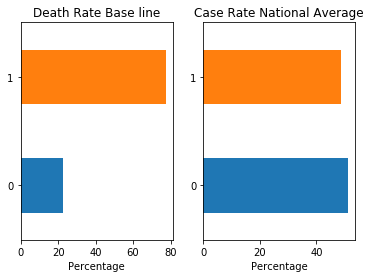

In [463]:
cl_deaths = (pd.value_counts(master['Deaths_Above_Baseline']) / len(master) * 100).sort_values()
cl_cases = (pd.value_counts(master['Cases_Above_Average']) / len(master) * 100)



plt.subplot(1, 2, 1)
cl_deaths.plot(kind = 'barh')
plt.title('Death Rate Base line')
plt.xlabel('Percentage')
#plt.ylabel('Injury type')

plt.subplot(1, 2, 2)
cl_cases.plot(kind = 'barh')
plt.title('Case Rate National Average')
plt.xlabel('Percentage')
#plt.ylabel('Injury type')

plt.show()

## Segregating the determinants based on their category. Socio-eco and physical environment, clinical-care, health-behaviors and health-outcomes-indicators.

In [114]:
# Health behaviors and co-morbidity
X_health = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'MV_Mortality_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners','Income_Ratio', 'pct_African_American',
       'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic',
       'pct_Non_Hispanic_White','pct_Fair_Poor', 'Physically_Unhealthy_Days', 
        'pct_LBW','pct_Alcohol_Impaired', 'Mentally_Unhealthy_Days', 'pct_Uninsured', 'PCP_Rate','Food_Environment_Index',
       'Dentist_Rate', 'MHP_Rate', 'Preventable_Hosp._Rate','Graduation_Rate', 'pct_Some_College', 'pct_access_excercise',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems', 'pct_Screened', 'pct_Vaccinated'], axis=1)

In [115]:
X_health.columns

Index(['pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate',
       'pct_Insufficient_Sleep', 'pct_Smokers', 'pct_Obese',
       'pct_Physically_Inactive', 'pct_Excessive_Drinking', 'Chlamydia_Rate',
       'Teen_Birth_Rate', 'Case_Rate', 'Death_Rate', 'Deaths_Above_Baseline',
       'Cases_Above_Average'],
      dtype='object')

In [116]:
#Socio-economical and physical environment
X_SEP = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate', 'Drug_Overdose_Mortality_Rate', 
        'MV_Mortality_Rate', 'pct_Insufficient_Sleep', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian','pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic','pct_Non_Hispanic_White',
       'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers','pct_Obese', 'pct_Physically_Inactive', 
        'Mentally_Unhealthy_Days', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated'
        ], axis=1)

In [117]:
X_SEP.columns

Index(['pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Household_Income', 'pct_Homeowners', 'Food_Environment_Index',
       'pct_access_excercise', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Income_Ratio',
       'Violent_Crime_Rate', 'Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems', 'Case_Rate', 'Death_Rate',
       'Deaths_Above_Baseline', 'Cases_Above_Average'],
      dtype='object')

In [118]:
#Clinical Care
X_clinic = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 
        'pct_Limited_Access_to_healthy_foods','Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate', 
        'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners',
        'pct_African_American', 'pct_American_Indian_Alaskan_Native', 'pct_Asian', 
        'pct_Native_Hawaiian_Other_Pacific_Islander', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
        'pct_Fair_Poor', 'Physically_Unhealthy_Days', 'pct_LBW', 'pct_Smokers',
       'pct_Obese', 'Food_Environment_Index', 'pct_Physically_Inactive','pct_access_excercise', 'pct_Excessive_Drinking', 
        'pct_Alcohol_Impaired', 'Chlamydia_Rate', 'Teen_Birth_Rate', 'Mentally_Unhealthy_Days', 
       'Graduation_Rate', 'pct_Some_College','Income_Ratio','pct_Unemployed', 'pct_Children_in_Poverty', 
        'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5',
       'pct_Severe_Housing_Problems'], axis=1)

In [119]:
X_clinic.columns

Index(['pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate',
       'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Case_Rate',
       'Death_Rate', 'Deaths_Above_Baseline', 'Cases_Above_Average'],
      dtype='object')

In [120]:
# Health outcomes
X_outcomes = master.drop(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
        'pct_Diabetic', 'HIV_Prevalence_Rate','pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate','pct_Insufficient_Sleep', 'Household_Income', 
        'pct_Homeowners', 'pct_African_American', 
        'pct_American_Indian_Alaskan_Native', 'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander', 
        'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Smokers','Income_Ratio','pct_Obese', 'Food_Environment_Index', 
        'pct_Physically_Inactive', 'pct_access_excercise', 'pct_Excessive_Drinking', 'pct_Alcohol_Impaired',
       'Chlamydia_Rate', 'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate', 'MHP_Rate', 
        'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated', 'Graduation_Rate', 'pct_Some_College',
       'pct_Unemployed', 'pct_Children_in_Poverty', 'Violent_Crime_Rate','Injury_Death_Rate', 'Average_Daily_PM2.5', 
        'pct_Severe_Housing_Problems'], axis=1)

In [121]:
X_outcomes.columns

Index(['Infant_Mortality_Rate', 'pct_Fair_Poor', 'Physically_Unhealthy_Days',
       'Mentally_Unhealthy_Days', 'pct_LBW', 'Case_Rate', 'Death_Rate',
       'Deaths_Above_Baseline', 'Cases_Above_Average'],
      dtype='object')

In [122]:
master.columns

Index(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate',
       'pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate',
       'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners',
       'pct_African_American', 'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander',
       'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Fair_Poor',
       'Physically_Unhealthy_Days', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index',
       'pct_Physically_Inactive', 'pct_access_excercise',
       'pct_Excessive_Drinking', 'pct_Alcohol_Impaired', 'Chlamydia_Rate',
       'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate',
       'MHP_Rate', 'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated',
       'Graduation_Rate', 'pct_Some_College', 'pct_Une

### Looking over the correlation of variables in each category with cancer rate

In [123]:
#sns.pairplot(X_SEP)

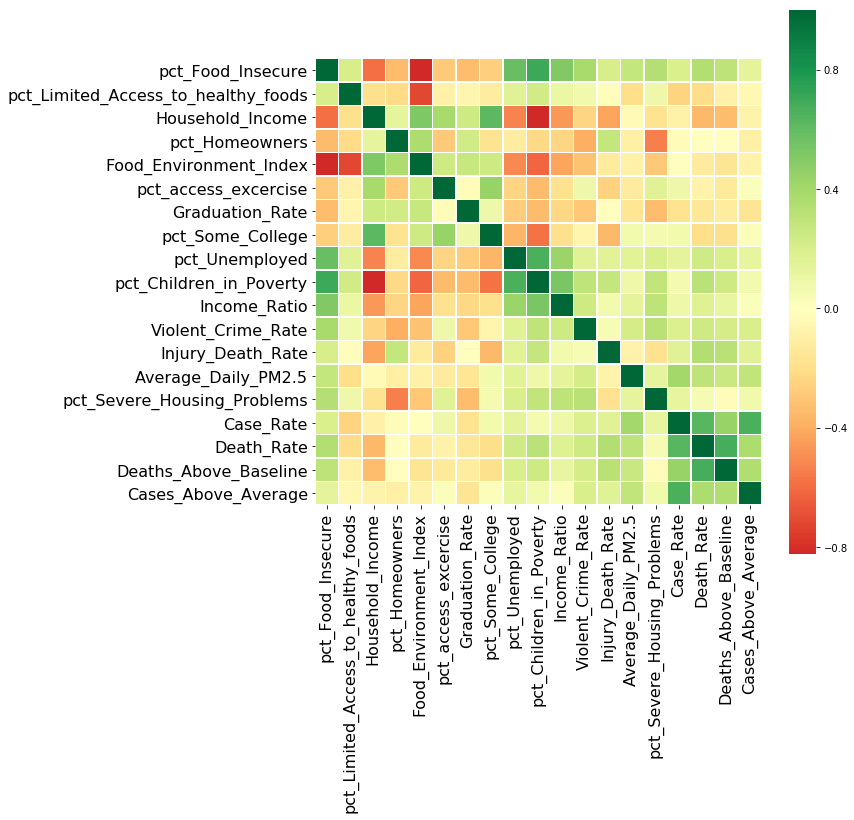

In [448]:
plt.figure(figsize=(10,10))

sns.heatmap(X_SEP.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

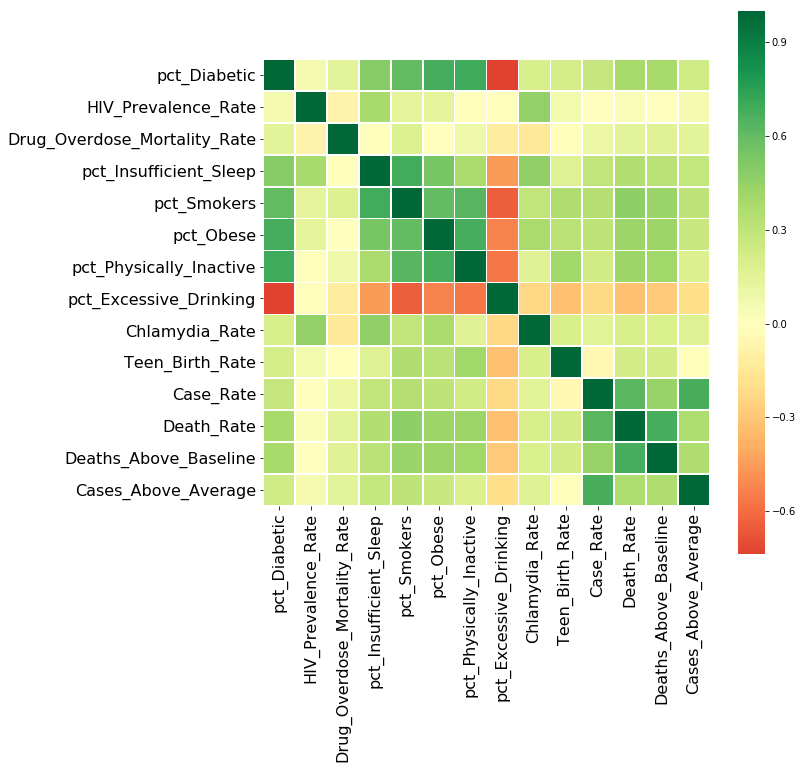

In [449]:
plt.figure(figsize=(10,10))
sns.heatmap(X_health.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

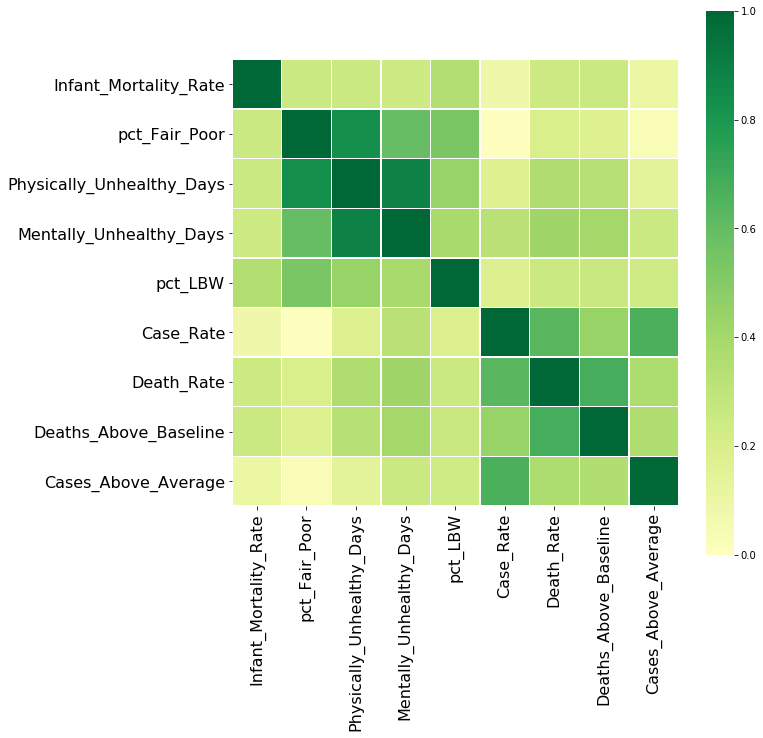

In [450]:
plt.figure(figsize=(10,10))
sns.heatmap(X_outcomes.corr(), square=True, cmap='RdYlGn', center=0,linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

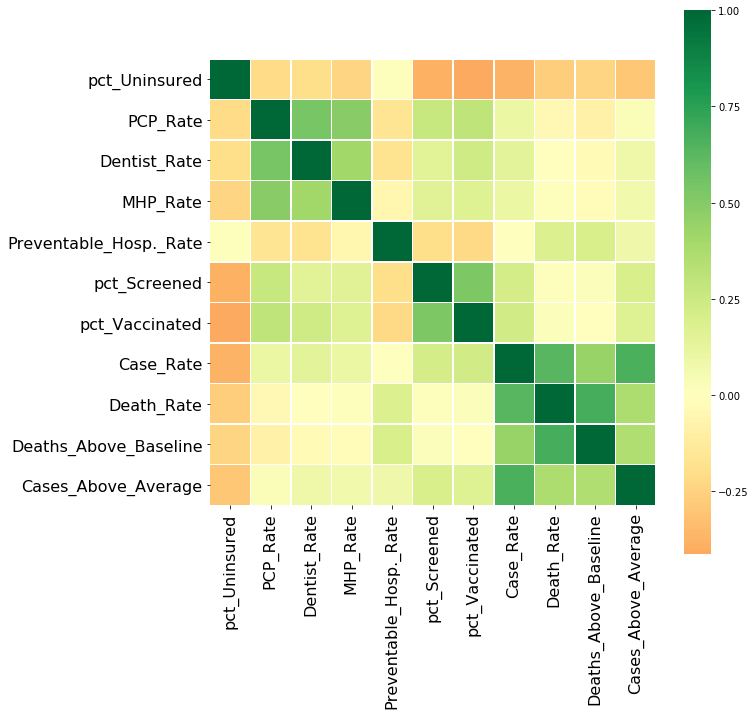

In [451]:
plt.figure(figsize=(10,10))
sns.heatmap(X_clinic.corr(), square=True, cmap='RdYlGn', center=0, linewidths=.5)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16);

# Modeling : 
## - Identifying factors, which can define cancer rate disparity in counties?
## - Identifyng counties having new cancer rate above the national average. 
## - Can we predict if a county is at risk cancer rate by this feature(s)?
## - Finding the feature(s) to detect above/below base-line of cancer death rate.
## - Can we set up an actionable target of those features to those counties which have above base-line cancer death rate considering 10% decrease in the cancer death rate as a target?

In [129]:
#Creating the target variable DataFrame where y_BBL is a labelled target variable.
y_death = pd.DataFrame(master.Death_Rate)
y_case = pd.DataFrame(master.Case_Rate)
y_Deaths_Above_Baseline = pd.DataFrame(master.Deaths_Above_Baseline)
y_Cases_Above_Average = pd.DataFrame(master.Cases_Above_Average)

In [321]:
#print(y_death.columns)
#print(y_case.columns)
#print(y_Deaths_Above_Baseline.columns)
#print(y_Cases_Above_Average.columns)
#print(y_death.info())
#print(y_case.info())
#print(y_Deaths_Above_Baseline.info())
#print(y_Cases_Above_Average.info())

In [195]:
# importing basic libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
# importing linear regressionfrom sklearn
from sklearn.linear_model import LinearRegression

##  Death Rate vs all features: Linear regression model

MODEL SCORE:  0.43407796875134064
MSE 737.1542557950231
coeff                                              0  Coefficient Estimate
0                         Child_Mortality_Rate             -0.028731
1                        Infant_Mortality_Rate              1.128110
2                                 pct_Diabetic             -1.403678
3                          HIV_Prevalence_Rate             -0.011064
4                            pct_Food_Insecure              1.072365
5          pct_Limited_Access_to_healthy_foods             -0.225800
6                 Drug_Overdose_Mortality_Rate              0.100690
7                            MV_Mortality_Rate              0.084031
8                       pct_Insufficient_Sleep              0.422392
9                             Household_Income             -0.000309
10                              pct_Homeowners              0.328753
11                        pct_African_American             -1.715798
12          pct_American_Indian_Alaskan_N

Text(0.5, 1.0, 'Residual plot')

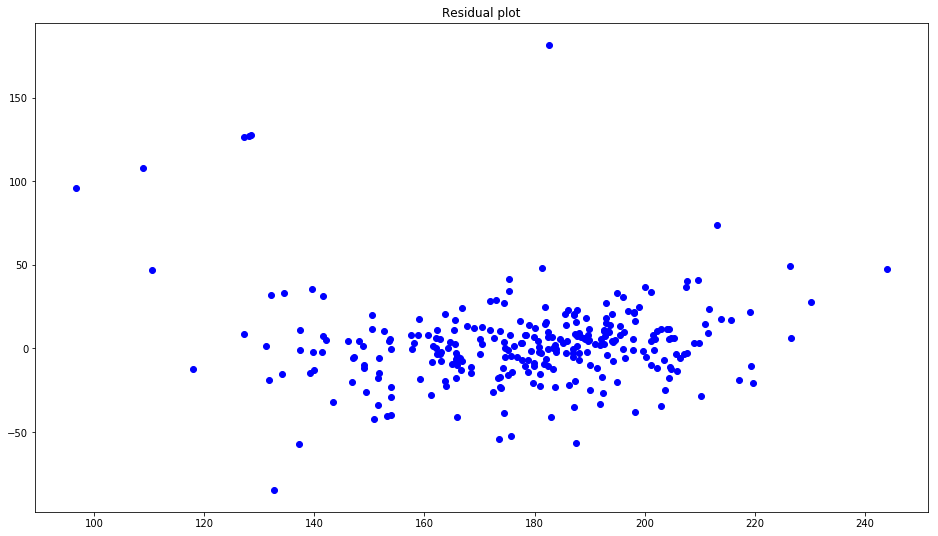

In [351]:
# Death Rate
lreg = LinearRegression()
#X and y
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model
model = lreg.fit(X_train,y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))

#predicting on test
pred = lreg.predict(X_test)

#calculating mse
mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.title('Residual plot')

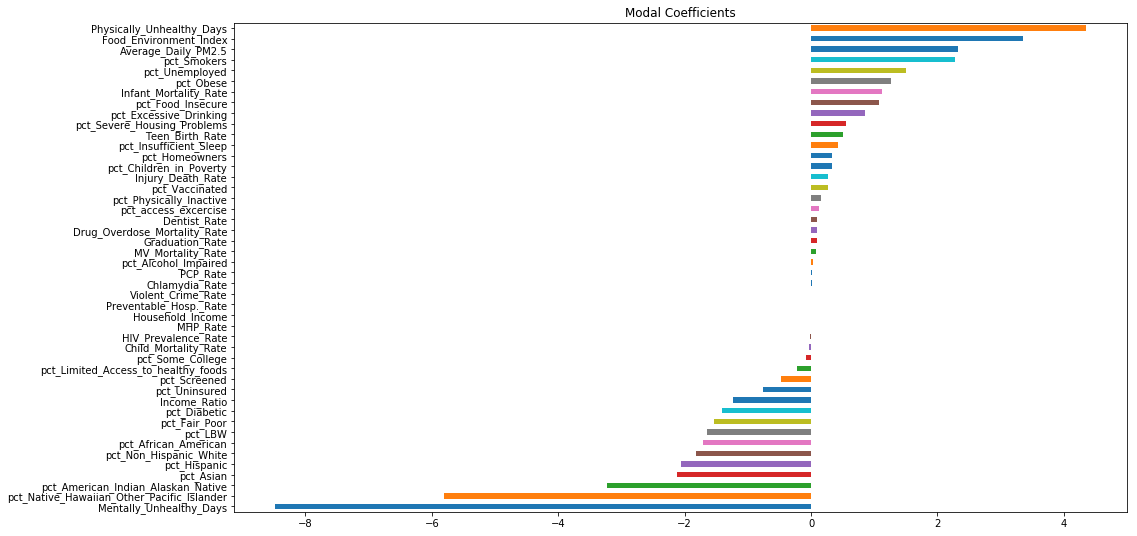

In [348]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='barh', title='Modal Coefficients')

# Feature selection based on coefficient estimate

In [352]:
master.columns

Index(['FIPS', 'State', 'County', 'Child_Mortality_Rate',
       'Infant_Mortality_Rate', 'pct_Diabetic', 'HIV_Prevalence_Rate',
       'pct_Food_Insecure', 'pct_Limited_Access_to_healthy_foods',
       'Drug_Overdose_Mortality_Rate', 'MV_Mortality_Rate',
       'pct_Insufficient_Sleep', 'Household_Income', 'pct_Homeowners',
       'pct_African_American', 'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Native_Hawaiian_Other_Pacific_Islander',
       'pct_Hispanic', 'pct_Non_Hispanic_White', 'pct_Fair_Poor',
       'Physically_Unhealthy_Days', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index',
       'pct_Physically_Inactive', 'pct_access_excercise',
       'pct_Excessive_Drinking', 'pct_Alcohol_Impaired', 'Chlamydia_Rate',
       'Teen_Birth_Rate', 'pct_Uninsured', 'PCP_Rate', 'Dentist_Rate',
       'MHP_Rate', 'Preventable_Hosp._Rate', 'pct_Screened', 'pct_Vaccinated',
       'Graduation_Rate', 'pct_Some_College', 'pct_Une

MODEL SCORE:  0.24684650058458213
MSE 981.0367448250943
R-Square 0.24684650058458213


Text(0.5, 1.0, 'Residual plot')

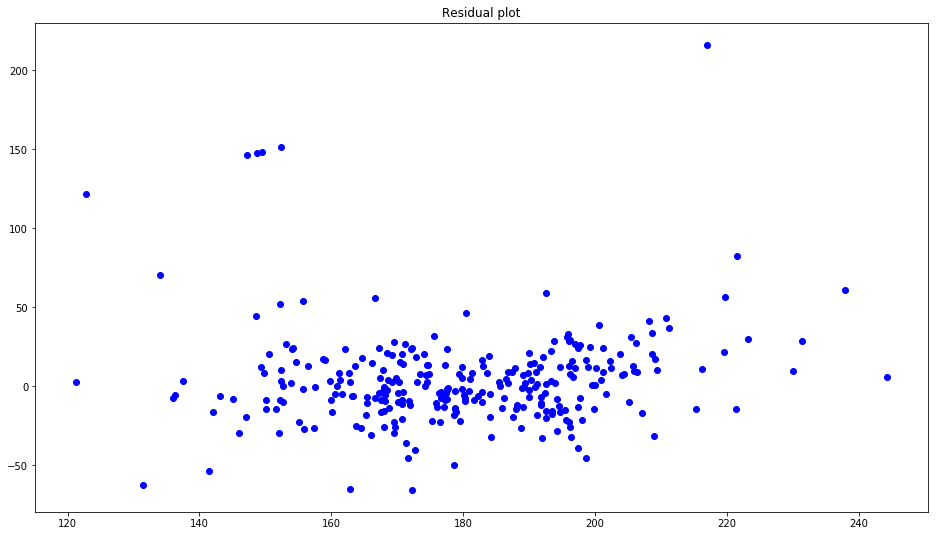

In [361]:
cols=['Mentally_Unhealthy_Days', 'pct_Native_Hawaiian_Other_Pacific_Islander',
      'pct_American_Indian_Alaskan_Native', 'pct_Asian', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
      'pct_African_American', 'pct_LBW','pct_Fair_Poor','pct_Diabetic','Income_Ratio',
      'pct_Uninsured',
      'Physically_Unhealthy_Days','Food_Environment_Index','Average_Daily_PM2.5',
      'pct_Smokers', 'pct_Unemployed','pct_Obese','Infant_Mortality_Rate', 'pct_Food_Insecure', 
      'pct_Excessive_Drinking', 'pct_Severe_Housing_Problems', 'Teen_Birth_Rate'
       ] 
X=master[cols]
y=master['Death_Rate']

# Death Rate
lreg = LinearRegression()

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model
model = lreg.fit(X_train,y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))

#predicting on test
pred = lreg.predict(X_test)

#calculating mse
mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
#print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.title('Residual plot')

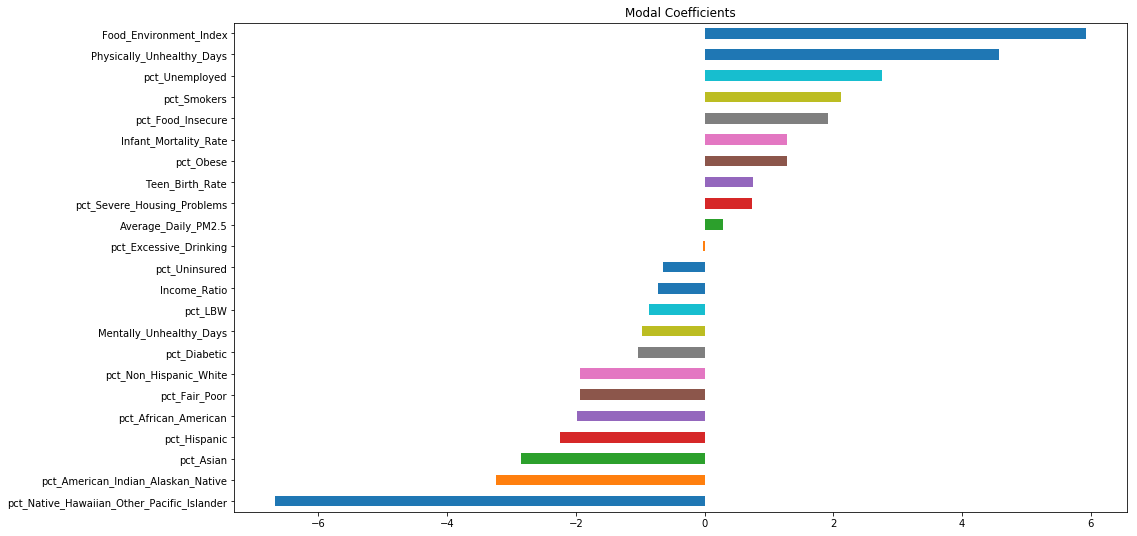

In [358]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='barh', title='Modal Coefficients')

## Case Rate vs all features: Linear regression model

MODEL SCORE:  0.3706897018138592
MSE 3725.55030341277
R-Square 0.3706897018138592


Text(0.5, 1.0, 'Residual plot')

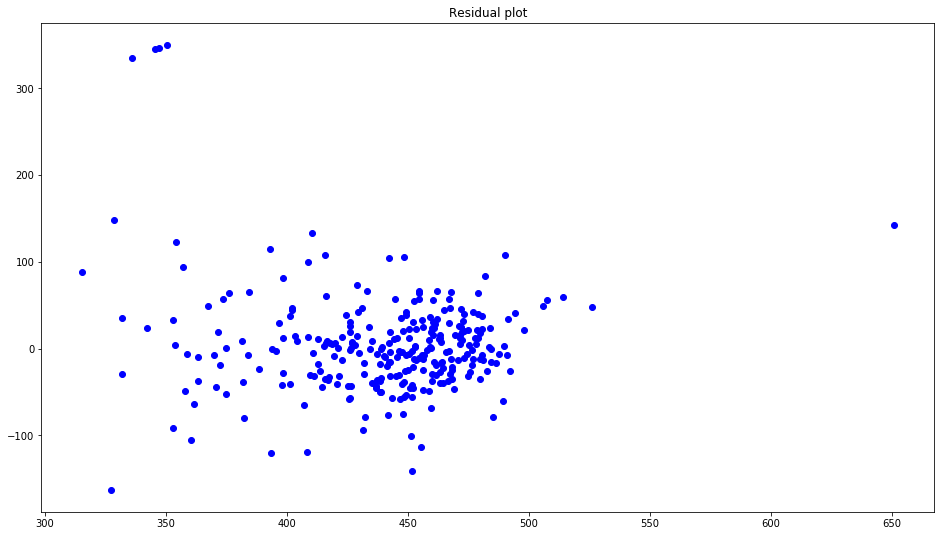

In [328]:
# New Case Rate
# Death Rate
lreg = LinearRegression()
#X and y
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate',
                'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model
model = lreg.fit(X_train,y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))

#predicting on test
pred = lreg.predict(X_test)

#calculating mse
mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
#print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot
x_plot = plt.scatter(pred, (pred - y_test), c='b')
plt.title('Residual plot')


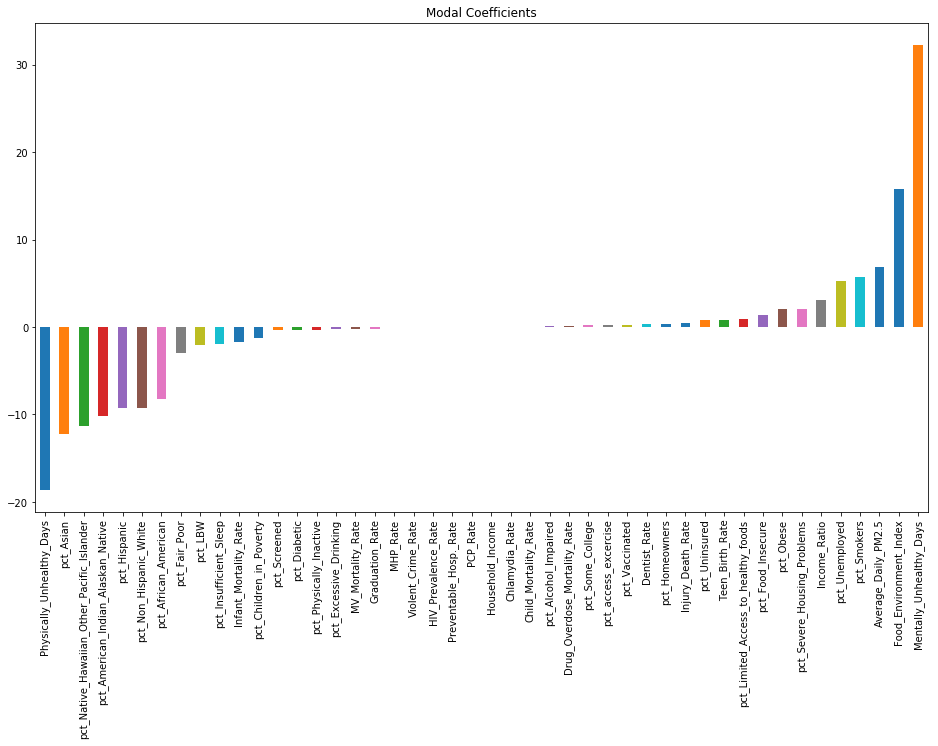

In [329]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns

coef = Series(lreg.coef_, predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients')

## Ridge

In [332]:
from sklearn.linear_model import Ridge
#Data sets
X = master.drop(['FIPS', 'State', 'County','Case_Rate', 'Death_Rate', 
                'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

model = ridgeReg.fit(X_train,y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))

#predicting on test
pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# RMSE
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')



MODEL SCORE:  0.3698353813559596
MSE 3730.6079257817555


ValueError: Found input variables with inconsistent numbers of samples: [286, 366]

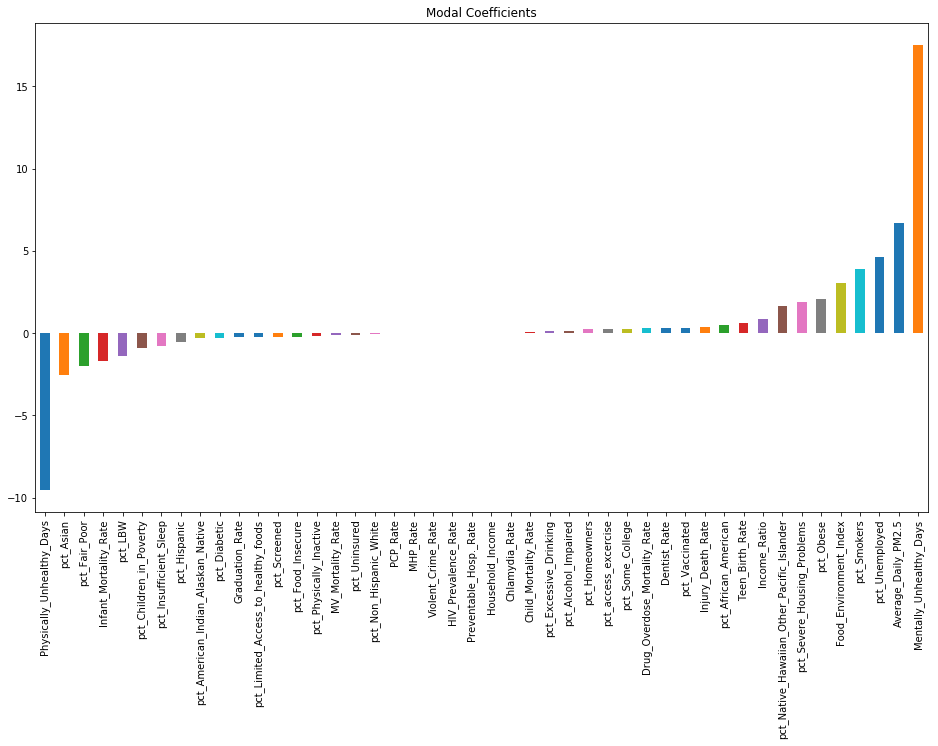

In [228]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns

coef = Series(ridgeReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')


# Case Rate: Lasso

In [333]:
from sklearn.linear_model import Lasso
#Data sets
X = master.drop(['FIPS', 'State', 'County','Case_Rate', 'Death_Rate', 
                'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model
lassoReg = Lasso(alpha=0.05, normalize=True)
model = lassoReg.fit(X_train,y_train)
pred = lassoReg.predict(X_test)



print('Lasso MODEL SCORE: ', model.score(X_test, y_test))



#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)

# RMSE
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lassoReg.coef_)
print('coeff', coeff)
print('R-Square', lassoReg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')


Lasso MODEL SCORE:  0.3492657203602126
MSE 3852.381408568681


ValueError: Found input variables with inconsistent numbers of samples: [286, 366]

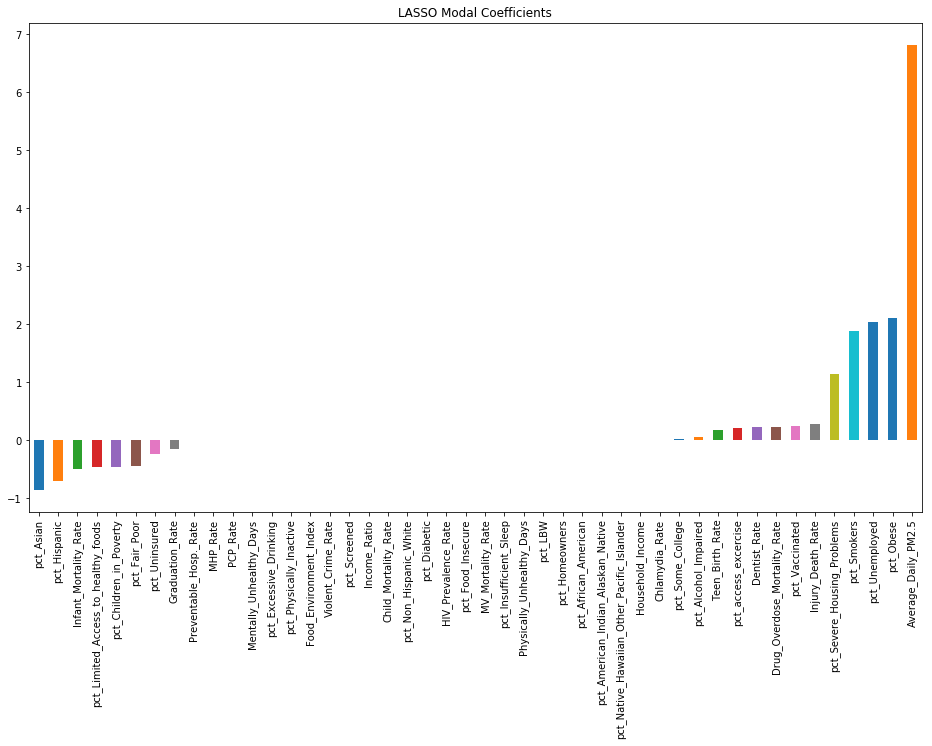

In [232]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns

coef = Series(lassoReg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='LASSO Modal Coefficients')


# Elastic Net Regression: Case Rate

MSE 3731.5397171096165
ENR MODEL SCORE:  0.3696779855806707
RMSE 440.5058624979977
coeff                                              0  Coefficient Estimate
0                         Child_Mortality_Rate             -0.011322
1                        Infant_Mortality_Rate             -1.250660
2                                 pct_Diabetic             -0.044168
3                          HIV_Prevalence_Rate             -0.009923
4                            pct_Food_Insecure             -0.651842
5          pct_Limited_Access_to_healthy_foods             -0.598005
6                 Drug_Overdose_Mortality_Rate              0.228274
7                            MV_Mortality_Rate             -0.259936
8                       pct_Insufficient_Sleep             -0.745211
9                             Household_Income             -0.000118
10                              pct_Homeowners              0.363598
11                        pct_African_American              0.627756
12          pc

Text(0.5, 1.0, 'Residual plot')

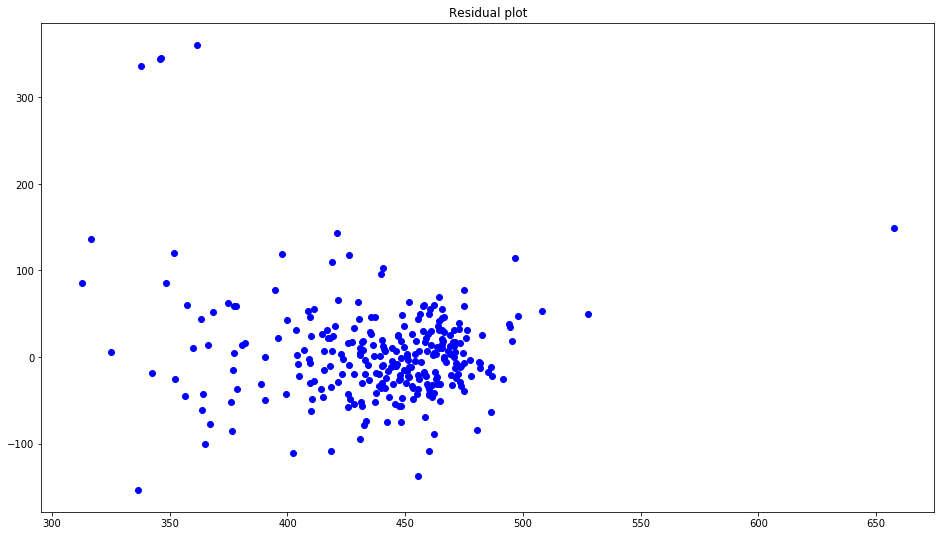

In [233]:
from sklearn.linear_model import ElasticNet

#Data sets
X = master.drop(['FIPS', 'State', 'County','Case_Rate', 'Death_Rate', 
                'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Case_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)
model = ENreg.fit(X_train, y_train)
pred = ENreg.predict(X_test)

#calculating mse
mse = np.mean((pred - y_test)**2)
print('MSE', mse)
#model score
print('ENR MODEL SCORE: ', model.score(X_test, y_test))
# RMSE
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(ENreg.coef_)
print('coeff', coeff)
print('R-Square', ENreg.score(X_test,y_test))

#residual plot
x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

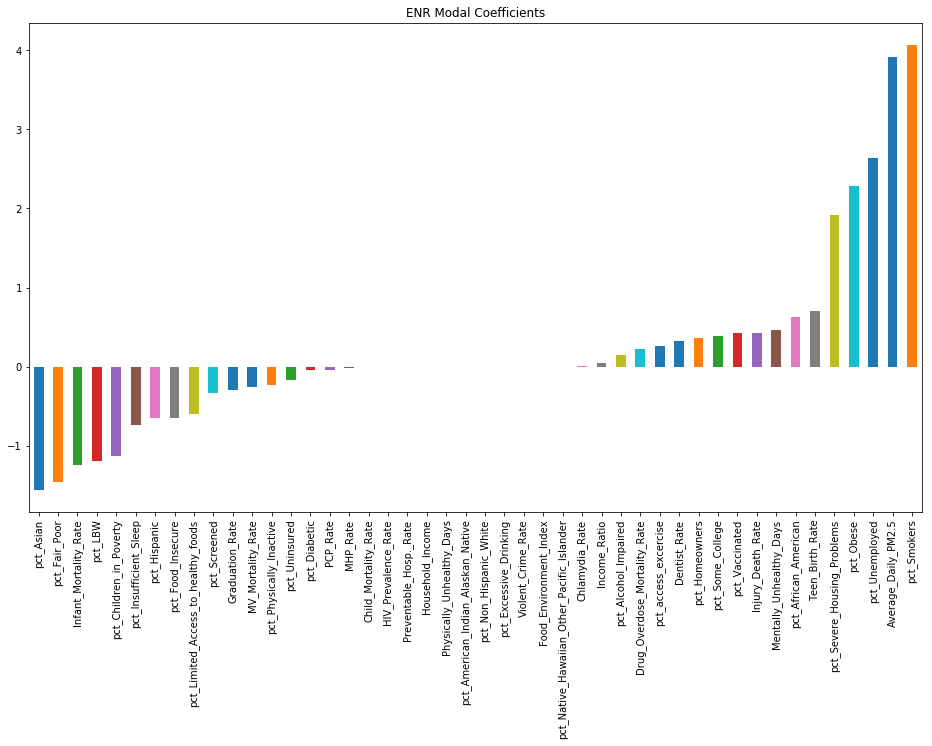

In [234]:
#checking the magnitude of coefficients
plt.rcParams["figure.figsize"] = (16,9)
predictors = X_train.columns

coef = Series(ENreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='ENR Modal Coefficients')

MODEL SCORE:  0.41490058885931685
MSE 762.1341760345863
coeff                                              0  Coefficient Estimate
0                         Child_Mortality_Rate              0.049394
1                        Infant_Mortality_Rate             -1.738189
2                                 pct_Diabetic             -0.331069
3                          HIV_Prevalence_Rate             -0.003129
4                            pct_Food_Insecure              1.401279
5          pct_Limited_Access_to_healthy_foods              0.928364
6                 Drug_Overdose_Mortality_Rate              0.155144
7                            MV_Mortality_Rate             -0.196855
8                       pct_Insufficient_Sleep             -1.915245
9                             Household_Income              0.000101
10                              pct_Homeowners              0.341424
11                        pct_African_American             -8.224375
12          pct_American_Indian_Alaskan_N

Text(0.5, 1.0, 'Residual plot')

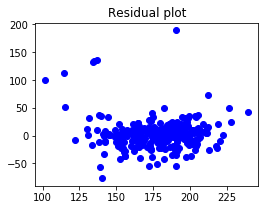

In [189]:
#Data sets
X = master.drop(['FIPS', 'State', 'County', 'Case_Rate', 'Death_Rate', 
                'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1)
y = master.Death_Rate

#splitting into training and test for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

#training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

model = ridgeReg.fit(X_train,y_train)

print('MODEL SCORE: ', model.score(X_test, y_test))

#predicting on test
pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print('MSE', mse)
# calculating coefficients
coeff = DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
print('coeff', coeff)
print('R-Square', lreg.score(X_test,y_test))

#residual plot

x_plot = plt.scatter(pred, (pred - y_test), c='b')

#plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

# Class based modeling

In [149]:
master.Deaths_Above_Baseline.value_counts(normalize=True)

1    0.773205
0    0.226795
Name: Deaths_Above_Baseline, dtype: float64

In [151]:
master.Cases_Above_Average.value_counts(normalize=True)

0    0.512259
1    0.487741
Name: Cases_Above_Average, dtype: float64

In [152]:
from plotly.plotly import iplot
import cufflinks as cf
import plotly.tools as tls
tls.embed('https://plot.ly/~cufflinks/8')
#! pip install cufflinks --upgrade
cf.__version__

'0.15'

In [155]:
labels = ['Below Base-line','Above Base-line']
values = [22.6795, 77.3205]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

#### Another thing to look at is high cardinality features. If we have more than 100 categories for each of these features, it won’t be very useful to use them. It would add dimensions to our dataset and we don’t want to do that.

In [158]:
X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate',
                             'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1))
#X = master.Injury_Death_Rate.values
y = master.Deaths_Above_Baseline

In [159]:
X.shape

(1142, 46)

In [160]:
#max_cardinality = 100
#high_cardinality = [col for col in X.select_dtypes(exclude=np.number)
                   #if X[col].nunique() > max_cardinality]
#X = X.drop(columns=high_cardinality)
#X.info()

In [161]:
y.shape

(1142,)

### So, we did not have and dropped any features with high cardinality. All the features are float or int64. The int and float objects can just be used as is.

Logistic Regression
Logistic Regression is great for multiclass classification because Scikit-learn encodes encodes the target labels automatically if they are strings. When you’re working with a learning model, it is important to scale the features to a range which is centered around zero. Scaling will make sure the variance of the features are in the same range.

In [162]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
#X = X.drop(columns='id') #id is our index and won't help our model
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [163]:
y.shape

(1142,)

# Class based models

## Logistic Regression 

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

MODEL SCORE:  0.6958041958041958
Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.70


## DecisionTree Classifier

In [187]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train, y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

MODEL SCORE:  0.6153846153846154
Accuracy of Decision Tree classifier on training set: 0.63
Accuracy of Decision Tree classifier on test set: 0.58


#### Setting max decision tree depth to help avoid overfitting

In [186]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

MODEL SCORE:  0.6748251748251748
Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.67


## K-Nearest Neighbors

In [185]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model = knn.fit(X_train, y_train)
print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

MODEL SCORE:  0.6888111888111889
Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.69


## Linear Discriminant Analysis

In [180]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
print('MODEL SCORE: ', model.score(X_test, y_test))

Accuracy of LDA classifier on training set: 0.75
Accuracy of LDA classifier on test set: 0.71
MODEL SCORE:  0.7062937062937062


## CatBoost

In [390]:
#Creating catboost model
from catboost import CatBoostClassifier
from sklearn.metrics import mean_absolute_error
from catboost import Pool
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from pandas_ml import ConfusionMatrix
from sklearn.metrics import mean_absolute_error
#! pip install pandas-ml

In [259]:
model = CatBoostClassifier(iterations=300, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error

y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('MSE: ', mse)
#Calculating score of the model
print('Model score on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('MODEL SCORE on test set: ', model.score(X_test, y_test))

MSE:  0.25874125874125875
Model score on training set: 0.97
MODEL SCORE on test set:  0.7412587412587412


In [170]:
#Printing confusion mmatrix
confusion_matrix(y_test, y_pred)

array([[ 41,  24],
       [ 15, 206]])

In [171]:
# Printing confusion matrix
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(TN, FP, FN, TP)
n = TN + FP + FN + TP

41 24 15 206


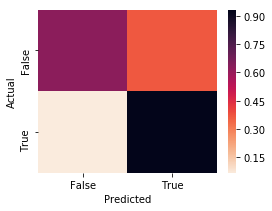

In [172]:
plt.rcParams["figure.figsize"] = (4,3)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

# Case above avg modeling

In [385]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [386]:
X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate','Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1))
#X = master.Injury_Death_Rate.values
y = master.Cases_Above_Average

In [387]:
X = scale(X) 
X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [389]:
# Logistic regression
logreg = LogisticRegression()
model = logreg.fit(X_train, y_train)
#print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
# Decision Tree
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
#print('MODEL SCORE: ', model.score(X_test, y_test))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))
#SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
#CatBoost
model = CatBoostClassifier(iterations=300, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
#print('MSE: ', mse)
#Calculating score of the model
print('Accuracy of Catboost classifier on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('Accuracy of Catboost classifier on test set: ', model.score(X_test, y_test))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.70
Accuracy of Decision Tree classifier on training set: 0.71
Accuracy of Decision Tree classifier on test set: 0.67
Accuracy of SVM classifier on training set: 0.83
Accuracy of SVM classifier on test set: 0.74
Accuracy of Catboost classifier on training set: 0.97
Accuracy of Catboost classifier on test set:  0.7412587412587412


In [381]:
#model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
#print('MODEL SCORE: ', model.score(X_test, y_test))
#print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     #.format(clf2.score(X_train, y_train)))
#print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     #.format(clf2.score(X_test, y_test)))

# Smote: modeling of death above baseline

In [274]:
!pip install imblearn

    100% |████████████████████████████████| 174kB 6.4MB/s ta 0:00:01
    100% |████████████████████████████████| 8.0MB 2.7MB/s ta 0:00:011
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [399]:
X = pd.DataFrame(master.drop(['FIPS', 'State', 'County','Case_Rate','Death_Rate',
                             'Deaths_Above_Baseline', 'Cases_Above_Average'], axis =1))
#X = master.Injury_Death_Rate.values
y = master.Deaths_Above_Baseline

In [400]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Deaths Below baseline in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of Deaths Above baseline",len(os_data_y[os_data_y['y']==1]))
print("Proportion of Death Below baseline data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of Death Above baseline data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  1218
Number of Deaths Below baseline in oversampled data 609
Number of Deaths Above baseline 609
Proportion of Death Below baseline data in oversampled data is  0.5
Proportion of Death Above baseline data in oversampled data is  0.5


In [432]:
#Creating catboost model
model = CatBoostClassifier(iterations=100, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('MSE: ', mse)
#Calculating score of the model
print('Model score on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('MODEL SCORE on test set: ', model.score(X_test, y_test))

#Printing confusion mmatrix
print(confusion_matrix(y_test, y_pred))

MSE:  0.1366120218579235
Model score on training set: 0.97
MODEL SCORE on test set:  0.8633879781420765


TypeError: 'numpy.ndarray' object is not callable

In [427]:
y_test

1144    0
990     0
478     1
161     1
1153    0
987     0
568     1
5       1
805     0
552     0
18      1
270     1
1124    0
672     0
202     1
801     0
580     1
1108    0
1049    0
601     0
1182    0
393     0
477     1
308     1
52      1
1058    0
406     1
834     0
939     0
351     1
       ..
920     0
632     1
881     0
731     1
239     0
110     1
1148    0
1034    0
397     1
358     0
861     0
501     1
549     1
625     1
1072    0
200     0
897     0
65      0
386     0
553     1
916     0
272     1
1057    0
165     1
655     1
996     0
528     0
825     0
483     1
1092    0
Name: Actual, Length: 366, dtype: int64

In [ ]:
plt.rcParams["figure.figsize"] = (4,3)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);

In [ ]:
data_final_vars=master.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 10)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

In [415]:
cols=['Infant_Mortality_Rate', 'pct_Food_Insecure', 'pct_Insufficient_Sleep', 'pct_African_American', 
      'pct_American_Indian_Alaskan_Native',
       'pct_Asian', 'pct_Hispanic', 'pct_Non_Hispanic_White', 
      'pct_Fair_Poor', 'Mentally_Unhealthy_Days', 'pct_LBW',
       'pct_Smokers', 'pct_Obese', 'Food_Environment_Index','Teen_Birth_Rate', 'pct_Uninsured', 'pct_Unemployed',
       'Average_Daily_PM2.5'] 
X=os_data_X[cols]
y=os_data_y['y']

In [416]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.387132
         Iterations 7
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.441      
Dependent Variable:       y                     AIC:                   979.0531   
Date:                     2019-05-08 21:17      BIC:                   1070.9425  
No. Observations:         1218                  Log-Likelihood:        -471.53    
Df Model:                 17                    LL-Null:               -844.25    
Df Residuals:             1200                  LLR p-value:           1.8788e-147
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           7.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------

p-value for pct_Native_Hawaiian_Other_Pacific_Islander and Physically_Unhealthy_Days is very high so I am dropping these features.

## Logistic Regression Model Fitting

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [422]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [423]:
confusion_matrix = confusion_matrix(y_test.tolist(), y_pred.tolist())
print(confusion_matrix)

TypeError: 'numpy.ndarray' object is not callable

In [405]:
from sklearn.metrics import classification_report

In [406]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.41      0.50        69
          1       0.86      0.95      0.90       274

avg / total       0.82      0.84      0.82       343



## Cross Validation

In [407]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.847


## ROC AUC Score

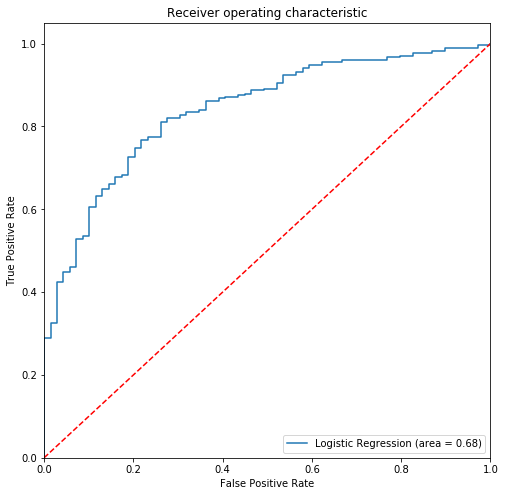

In [408]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.rcParams["figure.figsize"] = (8,8)
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Catboost model using selected features after oversampling death rate

In [424]:
model = CatBoostClassifier(iterations=100, boosting_type='Ordered', task_type="CPU")
model.fit(X_train, y_train, silent=True)
#Making predictions and calculating mean absolute error
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_pred, y_test)
print('MSE: ', mse)
#Calculating score of the model
print('Model score on training set: {:.2f}'.format(model.score(X_train, y_train)))
print('MODEL SCORE on test set: ', model.score(X_test, y_test))
#Printing confusion mmatrix
conf = ConfusionMatrix(y_test, y_pred)
print(conf)

MSE:  0.1366120218579235
Model score on training set: 0.97
MODEL SCORE on test set:  0.8633879781420765
Predicted  False  True  __all__
Actual                         
False         12    11       23
True          41    30       71
__all__       53    41       94


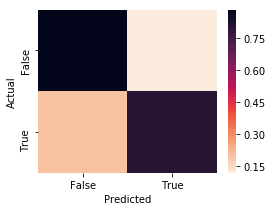

In [371]:
plt.rcParams["figure.figsize"] = (4,3)
cmap = sns.cm.rocket_r
conf = ConfusionMatrix(y_test.tolist(), y_pred)
conf.plot(backend='seaborn', normalized = True, cmap=cmap);